# Cats vs. Dogs using a simple Conv-Net and 22500 images

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, MaxPooling2D, Activation, BatchNormalization, Conv2D, Dense, Flatten, Input
from matplotlib import image
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from IPython.display import clear_output
from doge_utils import im_process, load_dataset

D:\Programs\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Programs\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Programs\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Programs\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

## Using Neural Network with Convolution Layers

In [ ]:
#Define Model
def model_conf(inp_shape):
    X_input = Input(shape = inp_shape, dtype = 'float32')
    
    X = Conv2D(filters = 6, kernel_size = 7, strides = 1, padding = 'valid')(X_input)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    
    X = Conv2D(filters = 12, kernel_size = 5, strides = 1, padding = 'valid')(X_input)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    X = Conv2D(filters = 24, kernel_size = 3, strides = 1, padding = 'valid')(X_input)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    X = Flatten()(X)
    X = Dropout(0.2)(X)
    X = Dense(1, activation='sigmoid')(X)
    
    return Model(inputs = X_input, outputs = X)

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
#Define Model
model1 = model_conf((256, 256, 3))

In [ ]:
#Compile Model
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#Load, preprocess batches and save to disk
batch_size = 5000
no_of_batches = 25000//batch_size
for i in range(no_of_batches):
    try:
        del X_train_orig
        del Y_train
        del X_test_orig
        del Y_test
    except:
        print("a")
    X_train_orig, Y_train, X_test_orig, Y_test = load_dataset(batch = i, m = batch_size)
    np.save("variables/batch/X_train_orig_batch_" + str(i), X_train_orig)
    np.save("variables/batch/X_test_orig_batch_" + str(i), X_test_orig)
    np.save("variables/batch/Y_train_batch_" + str(i), Y_train)
    np.save("variables/batch/Y_test_batch_" + str(i), Y_test)

In [8]:
batch_size = 5000
no_of_batches = 25000//batch_size

In [ ]:
#Load batches from disk and train on them
histories = list()
for i in tqdm(range(no_of_batches)):
    try:
        del X_train_orig
        del Y_train
        del X_test_orig
        del Y_test
    except:
        print("a")
    X_train_orig = np.load("variables/batch/X_train_orig_batch_" + str(i) + ".npy")
    X_test_orig = np.load("variables/batch/X_test_orig_batch_" + str(i) + ".npy")
    Y_train = np.load("variables/batch/Y_train_batch_" + str(i) + ".npy")
    Y_test = np.load("variables/batch/Y_test_batch_" + str(i) + ".npy")
    
    #normalize train and validation sets
    X_train = X_train_orig
    X_train/=255
    X_test = X_test_orig
    X_test/=255
    
    history = model1.fit(x = X_train, y = Y_train, epochs = 10, batch_size = 25, validation_data = (X_test, Y_test))
    histories.append(history)
model1.save("model1.h5")

In [ ]:
#visualize training
tr_train_loss = []
tr_test_loss = []
tr_train_acc = []
tr_test_acc = []
for i in range(no_of_batches):
    tr_train_loss += histories[i].history['loss']
    tr_test_loss += histories[i].history['val_loss']
    tr_train_acc += histories[i].history['acc']
    tr_test_acc += histories[i].history['val_acc']
    
plt.plot(tr_train_loss)
plt.plot(tr_test_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(tr_train_acc)
plt.plot(tr_test_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h3 align = "center">Visualizing training</h3>
<img src = "training_model_accuracy.png" align = "left">
<img src = "training_model_loss.png" align = "left">
<br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<p>Note: Images taken from train time</p>

In [11]:
#Load trained Model
model1 = tf.keras.models.load_model('model1.h5')

In [12]:
#Evaluate model using all test batches
try:
    del X_train_orig
    del Y_train
    del X_test_orig
    del Y_test
except:
    pass
evaluation = list()
for i in range(no_of_batches):
    X_test_orig = np.load("variables/batch/X_test_orig_batch_" + str(i) + ".npy")
    Y_test = np.load("variables/batch/Y_test_batch_" + str(i) + ".npy")
    X_test = X_test_orig
    X_test/=255
    evaluation.append(model1.evaluate(x = X_test, y = Y_test))

500/500 [==============================] - 2s 3ms/sample - loss: 1.1709 - acc: 0.8540


In [13]:
#Test loaded trained model
print("Average Loss: ", sum(map(lambda x: x[0], evaluation))/len(evaluation))
print("Average Accuracy: ", sum(map(lambda x: x[1], evaluation))/len(evaluation), "%")

Average Loss:  0.8535262838040479
Average Accuracy:  0.8895999908447265 %


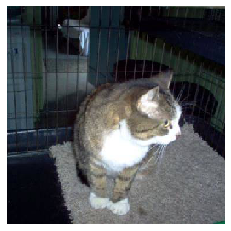

Prediction: 0.019859504 -> cat


In [20]:
#Test on some images
idx = 4
X_test_orig = np.load("variables/batch/X_test_orig_batch_" + str(1) + ".npy")
X_test = X_test_orig
X_test/=255
img = X_test[idx, :, :, :]
plt.imshow(img)
plt.axis('off')
plt.show()

img = np.expand_dims(img, axis = 0)
prob = np.squeeze(model.predict(img))
print("Prediction:", prob, "->", ("cat" if prob<0.5 else "dog"))